In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym_examples

In [2]:
from gym import envs
for k, v in enumerate(envs.registry):
    print((k, v))
    print()

(0, 'CartPole-v0')

(1, 'CartPole-v1')

(2, 'MountainCar-v0')

(3, 'MountainCarContinuous-v0')

(4, 'Pendulum-v1')

(5, 'Acrobot-v1')

(6, 'LunarLander-v2')

(7, 'LunarLanderContinuous-v2')

(8, 'BipedalWalker-v3')

(9, 'BipedalWalkerHardcore-v3')

(10, 'CarRacing-v2')

(11, 'Blackjack-v1')

(12, 'FrozenLake-v1')

(13, 'FrozenLake8x8-v1')

(14, 'CliffWalking-v0')

(15, 'Taxi-v3')

(16, 'Reacher-v2')

(17, 'Reacher-v4')

(18, 'Pusher-v2')

(19, 'Pusher-v4')

(20, 'InvertedPendulum-v2')

(21, 'InvertedPendulum-v4')

(22, 'InvertedDoublePendulum-v2')

(23, 'InvertedDoublePendulum-v4')

(24, 'HalfCheetah-v2')

(25, 'HalfCheetah-v3')

(26, 'HalfCheetah-v4')

(27, 'Hopper-v2')

(28, 'Hopper-v3')

(29, 'Hopper-v4')

(30, 'Swimmer-v2')

(31, 'Swimmer-v3')

(32, 'Swimmer-v4')

(33, 'Walker2d-v2')

(34, 'Walker2d-v3')

(35, 'Walker2d-v4')

(36, 'Ant-v2')

(37, 'Ant-v3')

(38, 'Ant-v4')

(39, 'Humanoid-v2')

(40, 'Humanoid-v3')

(41, 'Humanoid-v4')

(42, 'HumanoidStandup-v2')

(43, 'HumanoidStand

In [3]:
possible_actions = {"right": 0, "up": 1, "left": 2, "down": 3}

In [4]:
import gym
env = gym.make('gym_examples/distributed_offtake_of_the_unclaimed_power-v0')

In [5]:
env.reset()

({'agent': array([4, 1]), 'target': array([0, 2])}, {'distance': 5.0})

In [6]:
env.step(possible_actions["right"])

TypeError: 'int' object is not iterable

In [32]:
env = rl.Environment()

In [33]:
agent = arch.Agent()

print("agent shapes: ", agent.model_shapes)


agent shapes:  [(200, 94), (200,), (100, 200), (100,), (5, 100), (5,)]


In [34]:
s = env.reset(24)
action = agent.getAction(s)
print(action)

[-0.06106216  0.11105607  0.10171961 -0.00969571 -0.02963668]


In [35]:
def generate_episode(env, agent, num_of_steps=24): # не сессия, а эпизод, но осталось из старых задачек про лунар
    

    [[states, actions, rewards, done],
     [desired_total_Production_in_dinamics,
      total_Production_in_dinamics,
      run_out_of_elecs]]                       = rl.generate_episode(env,
                                                                     agent,
                                                                     num_of_steps=num_of_steps)

    [J,
     cost_of_run_out,
     MTRO,
     cost_of_deviation,
     total_cost,
     total_income]              = env.calc_cost_function(desired_total_Production_in_dinamics,
                                                         total_Production_in_dinamics,
                                                         run_out_of_elecs)

    total_reward = -J

    return [states, actions, total_reward]

In [36]:
[states, actions, total_reward] = generate_episode(env, agent, num_of_steps=24)

In [37]:
[states, actions, total_reward]

[[array([0.10656891, 0.38119359, 0.4520671 , 0.34731909, 0.32232489,
         0.0967317 , 0.69179023, 0.14990091, 1.        , 0.        ,
         0.76150226, 0.307866  , 0.05875985, 0.81482235, 0.10763348,
         0.27156486, 0.76720386, 0.        , 0.20658233, 0.00423953,
         0.66981263, 0.38852788, 0.33242027, 0.72499369, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0

### CEM steps


In [38]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]

    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions

    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]

    If you are confused, see examples below. Please don't assume that states are integers
    (they will become different later).
    """

    reward_threshold = np.percentile(rewards_batch, percentile)

    elite_states = []
    elite_actions = []
    
    for i, r in enumerate(rewards_batch):
        if r > reward_threshold:

            for t in range(len(states_batch[i])):

                elite_states.append(states_batch[i][t])
                elite_actions.append(actions_batch[i][t])

    return np.array(elite_states), np.array(elite_actions)

# Training loop
Generate sessions, select N best and fit to those.

In [39]:
from IPython.display import clear_output

def show_progress(sigma, len_sessions_buffer, rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f, len_sessions_buffer=%.3f, sigma=%.3f" % (mean_reward, threshold, len_sessions_buffer, sigma))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

In [40]:
import joblib

mean reward = -290.780, threshold=-282.044, len_sessions_buffer=200.000, sigma=0.010


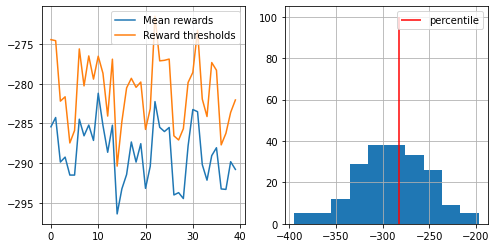

CPU times: user 20min 44s, sys: 9.24 s, total: 20min 53s
Wall time: 24min 14s


In [64]:

%%time

n_episodes = 100
percentile = 60 # 60 70
log = []

episodes_buffer = []

# best_mean_reward = -400

for i in range(40):
    # generate new sessions
    
    episodes = joblib.Parallel(n_jobs=-1)(joblib.delayed(generate_episode)(env, agent, num_of_steps=24) for _ in range(n_episodes))
    
    episodes_buffer.extend(episodes)

    states_batch, actions_batch, rewards_batch = map(np.array, zip(*episodes_buffer))

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=percentile)

    
    show_progress(agent.sigma, len(episodes_buffer), rewards_batch, log, percentile, reward_range=[np.min(rewards_batch), np.max(rewards_batch)])
    
    if ((i+1) % 2) == 0:
        episodes_buffer = []
        
    mean_reward = np.mean(rewards_batch)

    if mean_reward > 50:
        print("You Win! You may stop training now via KeyboardInterrupt.")
        if mean_reward > 500:
            break 
            


# Results

In [72]:
%%time

[[states, actions, rewards, done],
     [desired_total_Production_in_dinamics,
      total_Production_in_dinamics,
      run_out_of_elecs]]                       = rl.generate_episode(env,
                                                                     agent,
                                                                     num_of_steps=24)



CPU times: user 1.6 s, sys: 16 ms, total: 1.62 s
Wall time: 1.71 s


In [73]:
[J,
     cost_of_run_out,
     MTRO,
     cost_of_deviation,
     total_cost,
     total_income]              = env.calc_cost_function(desired_total_Production_in_dinamics,
                                                         total_Production_in_dinamics,
                                                         run_out_of_elecs)

num_of_switches = [elec.switch_num for elec in env.Plant]

In [74]:
print(num_of_switches)
print(run_out_of_elecs)

[3, 1, 4, 8, 3]
[6.90927778 6.68272222 3.45283333 7.30344444 7.5565    ]


In [75]:
print([J,
       cost_of_run_out,
       MTRO,
       cost_of_deviation,
       total_cost])

[353.4027691280197, 31.904777777780733, 7.55650000000086, 0.0034584626912801883, 31.908236240472014]


In [76]:
print([cost_of_run_out*0.15,
 cost_of_deviation*0.15,
 total_cost*0.15,
 total_income])

[4.78571666666711, 0.0005187694036920282, 4.786235436070802, 2.677753395915899]


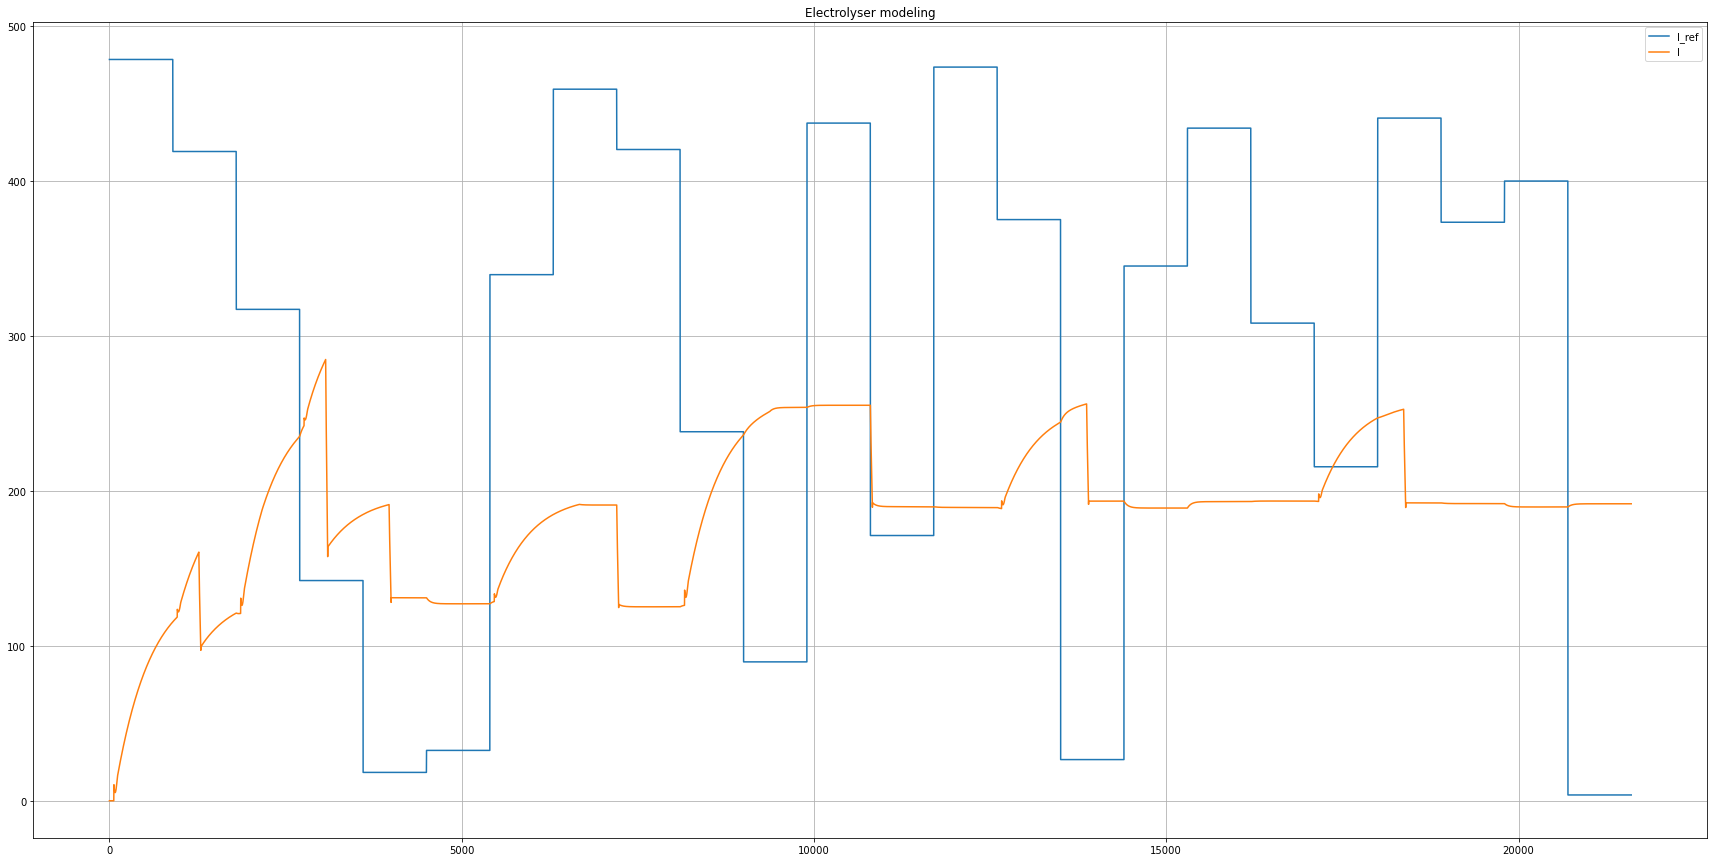

In [77]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')

plt.legend()
plt.grid(visible=True)

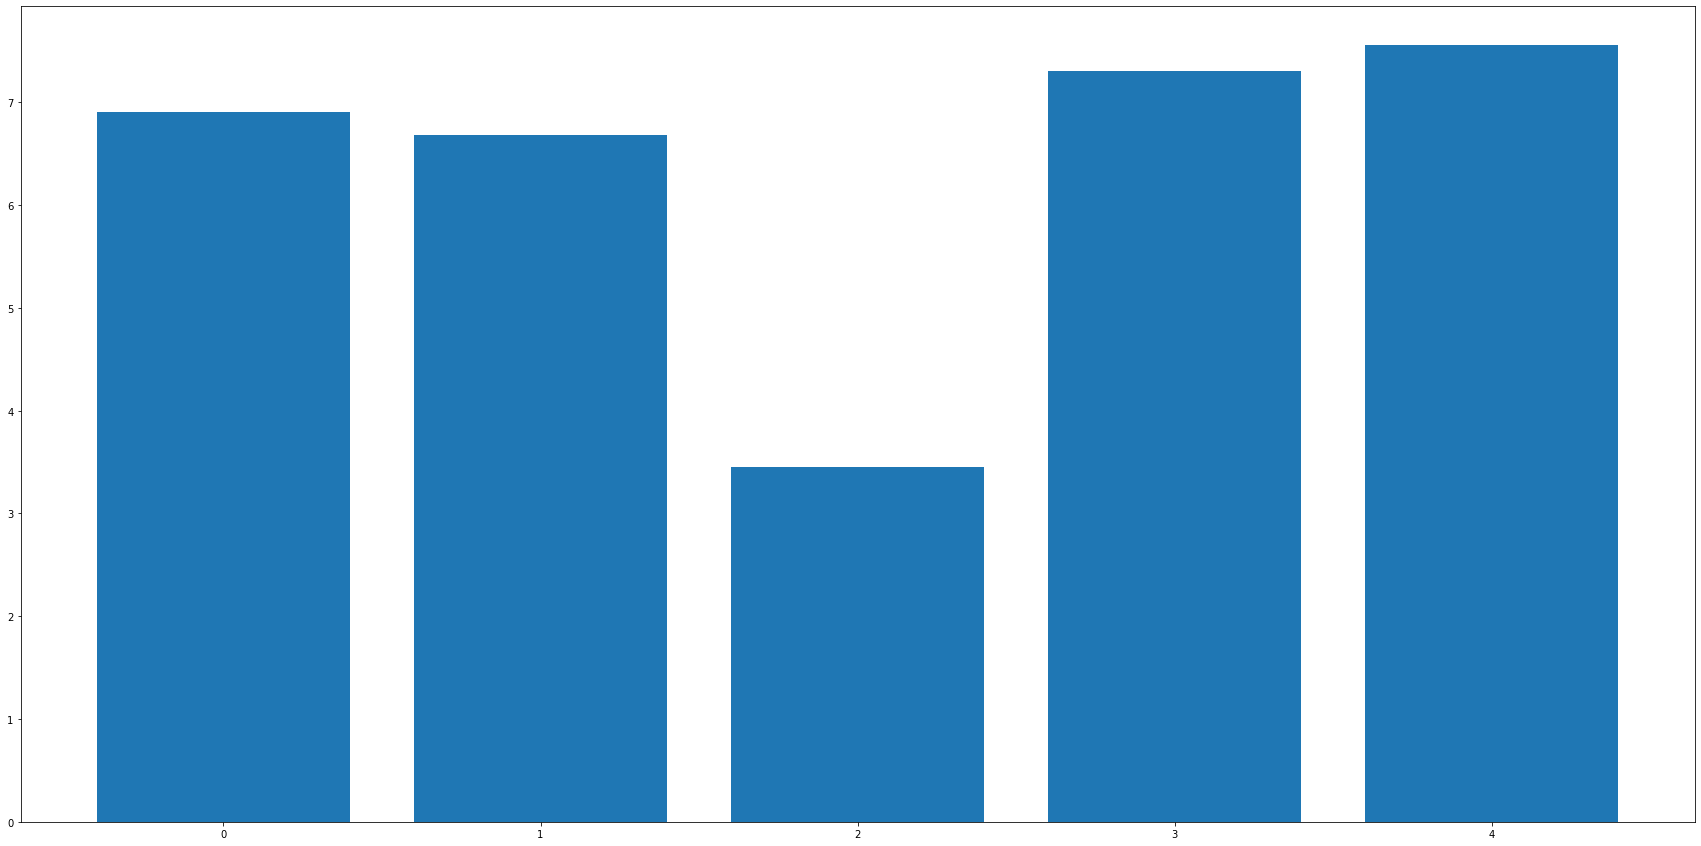

In [78]:
num_elecs = 5
names = list(range(num_elecs))
values = run_out_of_elecs

plt.figure(figsize=(30, 15))
plt.bar(names, values)
plt.show()

In [50]:
agent.model.parameters()
for param in agent.model.parameters():
    print(param.data)
    print("=======================================")
    

tensor([[ 0.1159,  0.1138, -0.0498,  ...,  0.0471,  0.0365, -0.0067],
        [ 0.0356,  0.0666, -0.0483,  ..., -0.0726, -0.0400, -0.0528],
        [ 0.0103,  0.0384,  0.0642,  ..., -0.0700, -0.0512, -0.0889],
        ...,
        [ 0.0019,  0.0002,  0.0642,  ...,  0.0002, -0.0063,  0.0976],
        [ 0.0841,  0.0240,  0.0188,  ...,  0.0102, -0.0430, -0.0282],
        [-0.0052, -0.1131, -0.0859,  ..., -0.0985,  0.0691, -0.0445]])
tensor([-0.0684,  0.0486,  0.0416, -0.0871, -0.0467, -0.0324,  0.0415,  0.0188,
         0.0113,  0.0366, -0.0805, -0.0141,  0.0628,  0.0598,  0.1343, -0.0396,
         0.0719, -0.0826, -0.0020, -0.0619,  0.0917, -0.0168, -0.0507, -0.0444,
        -0.0057, -0.1165,  0.0828, -0.0392, -0.0679, -0.0049, -0.0201, -0.1022,
         0.0892,  0.0393,  0.0797,  0.0106, -0.0029, -0.0882,  0.0445, -0.0611,
         0.0409, -0.1107, -0.0578, -0.0523, -0.1049,  0.0012, -0.0746,  0.0650,
         0.0225, -0.0525])
tensor([[-0.0598,  0.0941, -0.1315,  ..., -0.0861,  0.0673,

In [79]:
import pickle

file_model = open('serialised_data_CEM/best_agent.pkl', 'wb')

pickle.dump(agent, file_model)

file_model.close()